### Flight Price Prediction

### Importing Liberary

In [67]:
#data
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

#models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#metrics

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#model save
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
data=pd.read_excel(r'D:\FLIPROBO\2022\mar\Fligh-Price-Prediction\Data_Train.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.shape

(10683, 11)

Data set have 10683 obsservation and 10 features , Price is our target.

In [5]:
#checking for whitespace
data= data.apply(lambda x: x.str.strip() if x.dtype == object else x)

### Data Cleaning

As here we can see few date and time features which we need to convert in numeric data. so lets fix these features first.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Data_of_Journey, Dep_time,Arrival_time are datetime feature. so first of all convert then in datetime.

In [7]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


Datatype has been changed for all 3 feaures no we can extract details.

In [9]:
#extracting day/month/year & hour/minute in seperate columns

data['Date_of_Journey_date']=data['Date_of_Journey'].dt.day
data['Date_of_Journey_month']=data['Date_of_Journey'].dt.month
data['Date_of_Journey_year']=data['Date_of_Journey'].dt.year

data['Dep_Time_hr']=data['Dep_Time'].dt.hour
data['Dep_Time_minute']=data['Dep_Time'].dt.minute

data['Arrival_Time_hr']=data['Arrival_Time'].dt.hour
data['Arrival_Time_minute']=data['Arrival_Time'].dt.minute

we have extracted details from date time so now we can remove original features.

In [10]:
data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)

### Duplicated Test

In [11]:
data.duplicated().sum()

222

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

Found some duplicate observations which has removed now.

### Null Testing

In [14]:
data.isna().sum()

Airline                  0
Source                   0
Destination              0
Route                    1
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date_of_Journey_date     0
Date_of_Journey_month    0
Date_of_Journey_year     0
Dep_Time_hr              0
Dep_Time_minute          0
Arrival_Time_hr          0
Arrival_Time_minute      0
dtype: int64

we have only 1 null in route & Total_Stops, we can remove it

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data.isna().sum()

Airline                  0
Source                   0
Destination              0
Route                    0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Date_of_Journey_date     0
Date_of_Journey_month    0
Date_of_Journey_year     0
Dep_Time_hr              0
Dep_Time_minute          0
Arrival_Time_hr          0
Arrival_Time_minute      0
dtype: int64

In [17]:
data.shape

(10460, 15)

null observations has removed now. now there is no null value in dataset.

### Encoding other Features

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10460 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10460 non-null  object
 1   Source                 10460 non-null  object
 2   Destination            10460 non-null  object
 3   Route                  10460 non-null  object
 4   Duration               10460 non-null  object
 5   Total_Stops            10460 non-null  object
 6   Additional_Info        10460 non-null  object
 7   Price                  10460 non-null  int64 
 8   Date_of_Journey_date   10460 non-null  int64 
 9   Date_of_Journey_month  10460 non-null  int64 
 10  Date_of_Journey_year   10460 non-null  int64 
 11  Dep_Time_hr            10460 non-null  int64 
 12  Dep_Time_minute        10460 non-null  int64 
 13  Arrival_Time_hr        10460 non-null  int64 
 14  Arrival_Time_minute    10460 non-null  int64 
dtypes: int64(8), object

In [19]:
#filtering string features

for col in data.columns:
    if data[col].dtypes=='object':
        print(col)

Airline
Source
Destination
Route
Duration
Total_Stops
Additional_Info


verify object features one by one.

In [20]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
print(data['Destination'].value_counts())
print('\n ',data['Source'].value_counts())

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

  Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64


As we have source/destination & total_stops features, so we can remove feature 'route' which is also giving almost same information. so here we can remove Route.

In [22]:
del data['Route']

In [23]:
data['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     334
2h 55m     331
2h 35m     329
          ... 
28h 30m      1
5m           1
34h          1
32h 55m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

Splitting hour and minutes from 'Duration' column

In [25]:
data['h']=data['Duration'].apply(lambda x:x+' 00m' if len(x)<4 else x)
data['Duration_hour']=data['h'].apply(lambda x:x.split(' ')[0].replace('h',""))
data['Duration_minute']=data['h'].apply(lambda x:x.split(' ')[1].replace('m',""))

Found an outlier during checking data. no flght travel within 5m so removing it.

In [26]:
data.drop(data[data['Duration_hour']=='5m'].index,inplace=True)

In [27]:
#change datatype of newly extracted features.
data['Duration_hour']=data['Duration_hour'].astype(int)
data['Duration_minute']=data['Duration_minute'].astype(int)

In [28]:
#we have split hours minutes for duration so now we can remove col:duration and helper col:h.

data.drop(columns=['Duration','h'],inplace=True)

In [29]:
print(data['Total_Stops'].value_counts())
print('\n','-'*50,'\n',data['Additional_Info'].value_counts())

1 stop      5625
non-stop    3473
2 stops     1317
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

 -------------------------------------------------- 
 No info                         8179
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


'Stops' is ordinal data so manually converting it.

In [30]:
data['Total_Stops']=data['Total_Stops'].map({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4})

In [31]:
data['Total_Stops'].value_counts()

1    5625
0    3473
2    1317
3      43
4       1
Name: Total_Stops, dtype: int64

where ever we found no info or any other value found in 1 observation have converted as 0, later on we will remove them.

In [32]:
data['Additional_Info']=data['Additional_Info'].replace(['No info','No Info','2 Long layover','Red-eye flight','1 Short layover'],0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10459 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10459 non-null  object
 1   Source                 10459 non-null  object
 2   Destination            10459 non-null  object
 3   Total_Stops            10459 non-null  int64 
 4   Additional_Info        10459 non-null  object
 5   Price                  10459 non-null  int64 
 6   Date_of_Journey_date   10459 non-null  int64 
 7   Date_of_Journey_month  10459 non-null  int64 
 8   Date_of_Journey_year   10459 non-null  int64 
 9   Dep_Time_hr            10459 non-null  int64 
 10  Dep_Time_minute        10459 non-null  int64 
 11  Arrival_Time_hr        10459 non-null  int64 
 12  Arrival_Time_minute    10459 non-null  int64 
 13  Duration_hour          10459 non-null  int32 
 14  Duration_minute        10459 non-null  int32 
dtypes: int32(2), int64(

### One Hot enconding

In [34]:
data = pd.get_dummies(data, columns = ['Airline','Source','Destination','Additional_Info'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10459 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Total_Stops                                   10459 non-null  int64
 1   Price                                         10459 non-null  int64
 2   Date_of_Journey_date                          10459 non-null  int64
 3   Date_of_Journey_month                         10459 non-null  int64
 4   Date_of_Journey_year                          10459 non-null  int64
 5   Dep_Time_hr                                   10459 non-null  int64
 6   Dep_Time_minute                               10459 non-null  int64
 7   Arrival_Time_hr                               10459 non-null  int64
 8   Arrival_Time_minute                           10459 non-null  int64
 9   Duration_hour                                 10459 non-null  int32
 10  Duration_m

In [36]:
data.nunique()

Total_Stops                                        5
Price                                           1870
Date_of_Journey_date                               9
Date_of_Journey_month                              7
Date_of_Journey_year                               1
Dep_Time_hr                                       24
Dep_Time_minute                                   12
Arrival_Time_hr                                   24
Arrival_Time_minute                               12
Duration_hour                                     43
Duration_minute                                   12
Airline_Air Asia                                   2
Airline_Air India                                  2
Airline_GoAir                                      2
Airline_IndiGo                                     2
Airline_Jet Airways                                2
Airline_Jet Airways Business                       2
Airline_Multiple carriers                          2
Airline_Multiple carriers Premium economy     

In [37]:
#additional _info_0 have no info features.so we can remove it.
data.drop(columns=['Additional_Info_0'],inplace=True)

In [38]:
#date of journey have single element only so we can remove it.
data.drop(columns=['Date_of_Journey_year'],inplace=True)

In [39]:
data.shape

(10459, 38)

Data is all clean now . no null values in dataset & all features are numeric now.

### Describe Data

In [40]:
data.describe()

,Total_Stops,Price,Date_of_Journey_date,Date_of_Journey_month,Dep_Time_hr,Dep_Time_minute,Arrival_Time_hr,Arrival_Time_minute,Duration_hour,Duration_minute,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,0.802371,9026.566880,12.630844,5.535042,12.476336,24.403863,13.389808,24.720337,10.028683,28.208242,...,0.415432,0.120948,0.066546,0.036428,0.087198,0.001817,0.000382,0.000669,0.184148,0.030404
std,0.660507,4624.566337,8.791184,2.995565,5.726415,18.816225,6.854328,16.568434,8.377915,16.877248,...,0.492820,0.326083,0.249245,0.187361,0.282138,0.042585,0.019553,0.025863,0.387623,0.171706
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8266.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12343.500000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All feature have equal data and data seems good for further processing.

<AxesSubplot:>

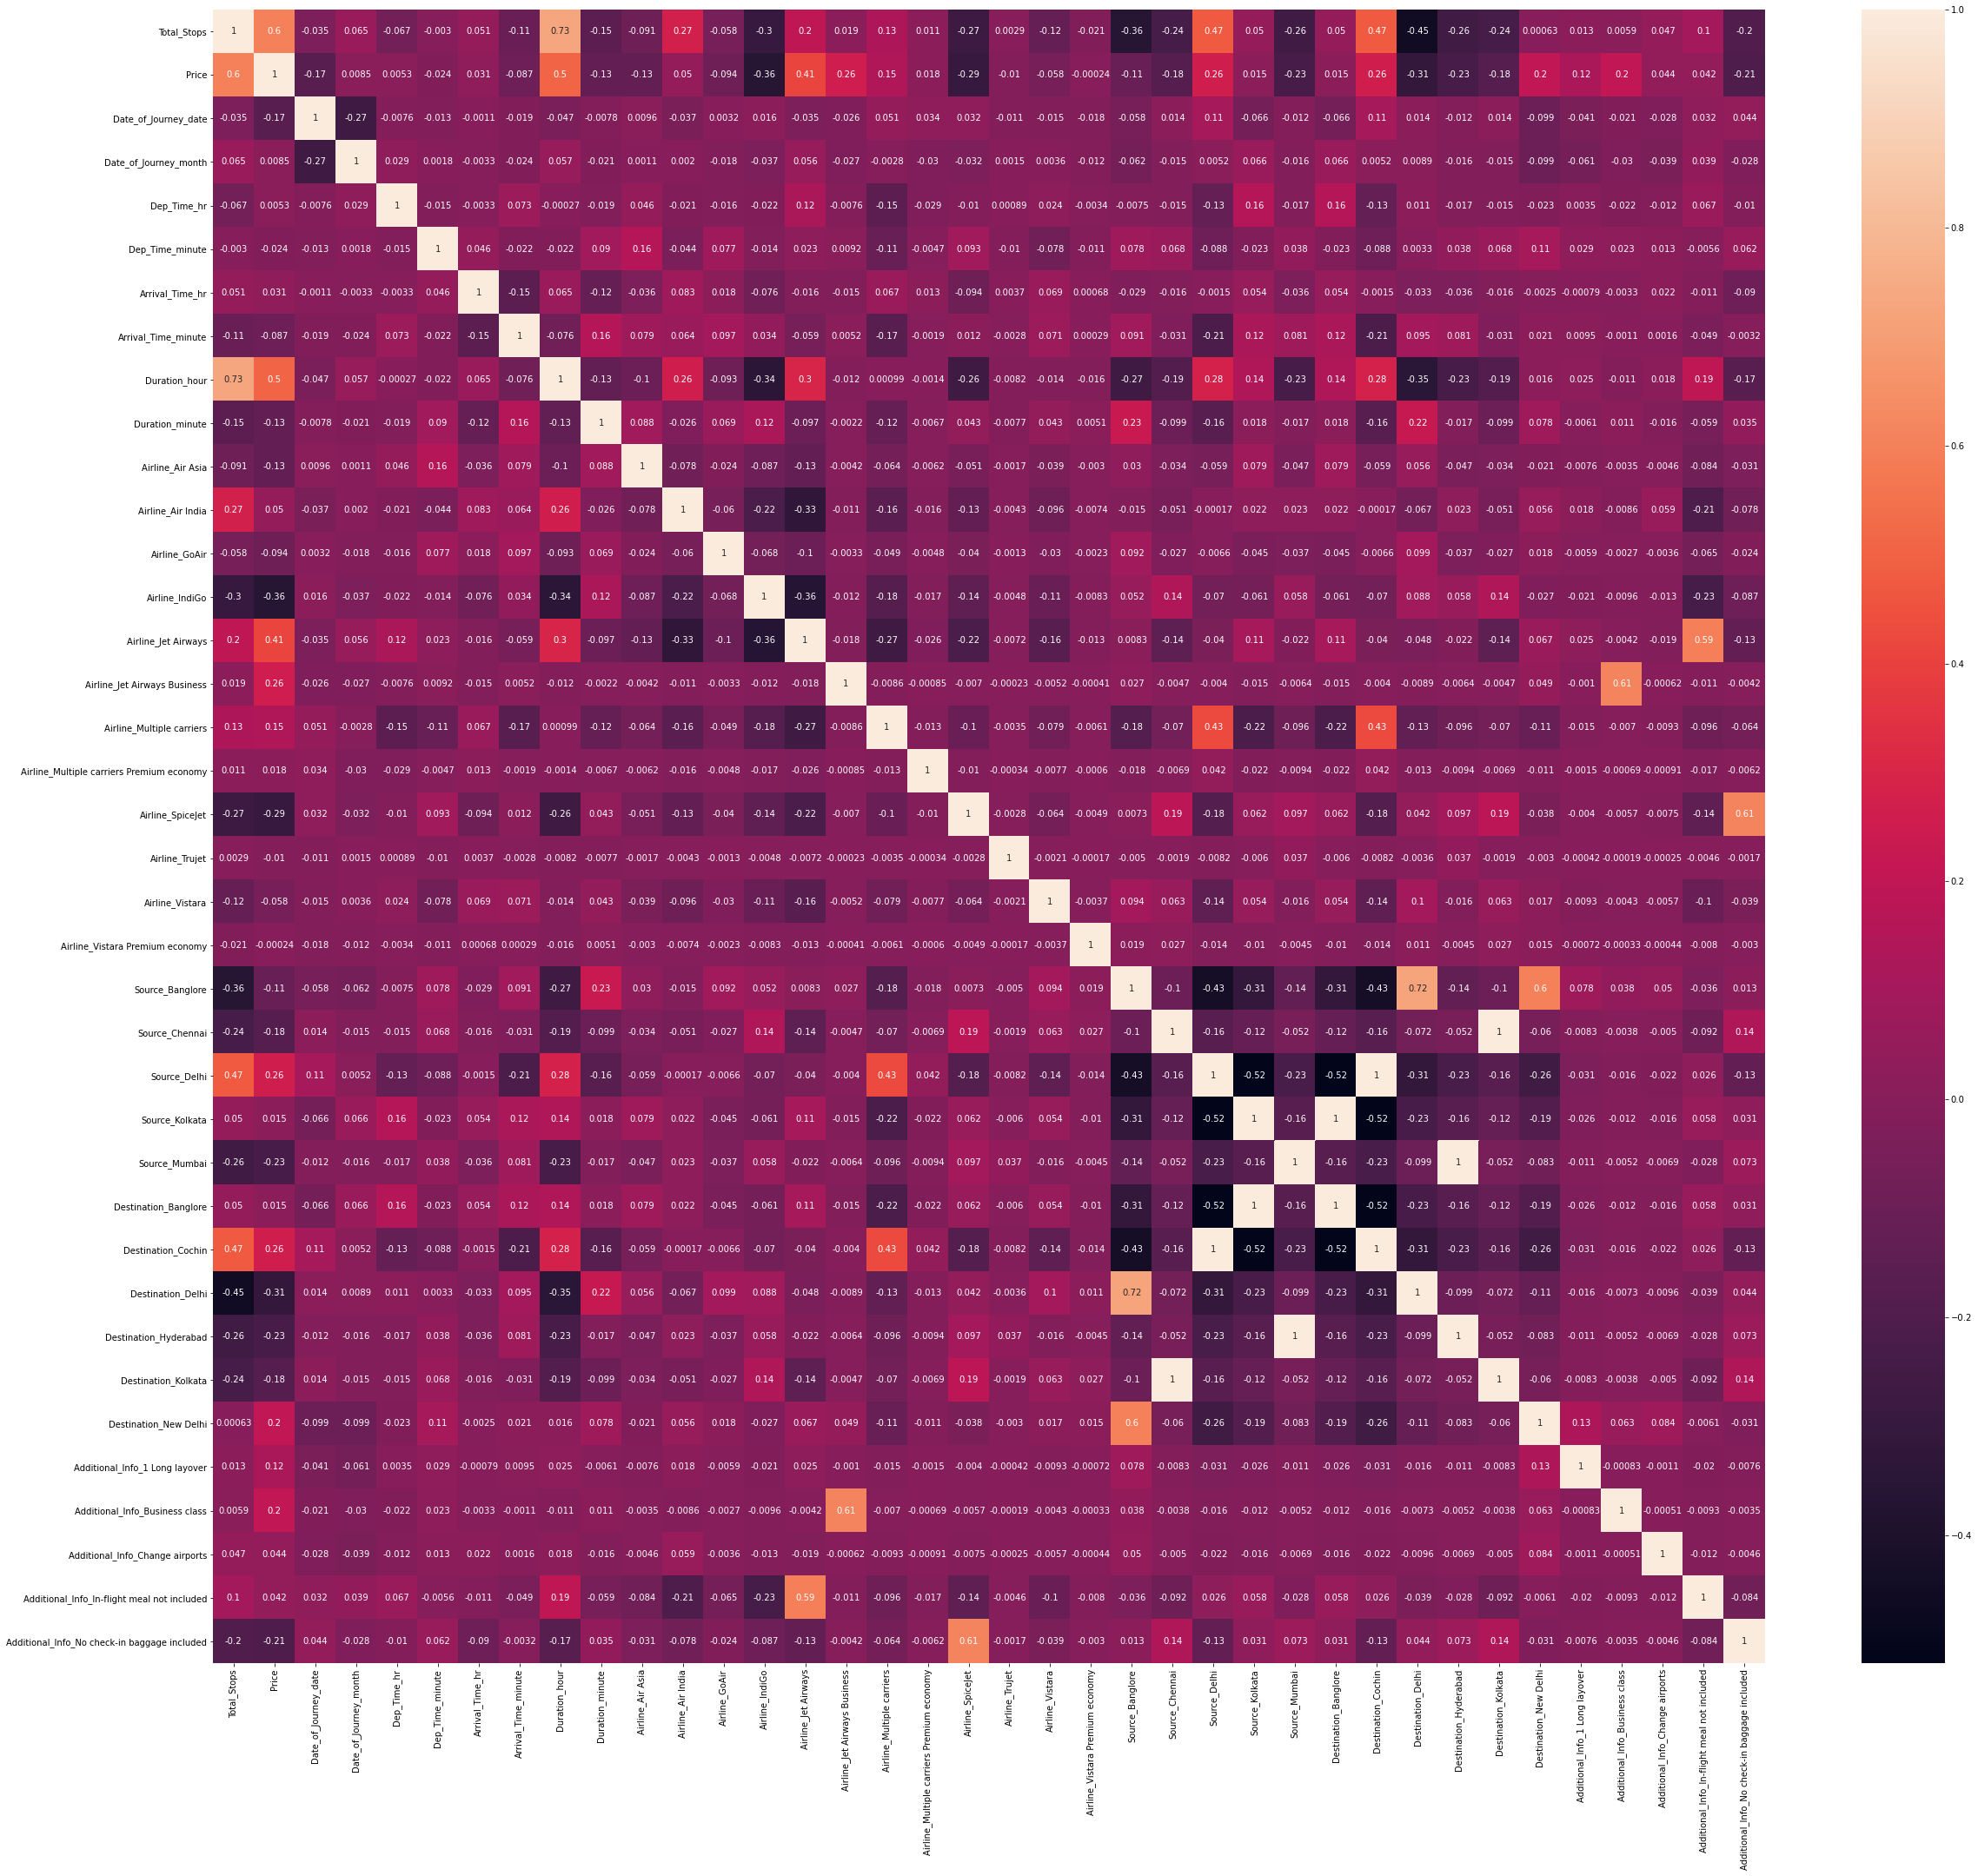

In [41]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr(),annot=True)

many features having very less correlation with target.
mulcollinearity also can seen in some of the features.

In [43]:
pd.DataFrame(data.corrwith(data['Price']),columns=['Corr']).sort_values('Corr',ascending=False)

,Corr
Price,1.000000
Total_Stops,0.601854
Duration_hour,0.504470
Airline_Jet Airways,0.411583
Destination_Cochin,0.261604
Source_Delhi,0.261604
Airline_Jet Airways Business,0.255584
Additional_Info_Business class,0.202119
Destination_New Delhi,0.200104
Airline_Multiple carriers,0.145780


Here also we can see few features having very less correlation with target.

### Multicollinearity Test with VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
X=data.drop(columns=['Price'])
y=data['Price']

In [46]:
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

In [47]:
vif=pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif["features"]=X.columns

vif

,vif,features
0,3.205574,Total_Stops
1,1.118374,Date_of_Journey_date
2,1.112433,Date_of_Journey_month
3,1.066304,Dep_Time_hr
4,1.112553,Dep_Time_minute
5,1.083745,Arrival_Time_hr
6,1.133186,Arrival_Time_minute
7,2.530538,Duration_hour
8,1.153055,Duration_minute
9,inf,Airline_Air Asia


As we can see mulicollinearity problem there so we will apply PCA here to dimension reduction as well eliminate multicollinearity.

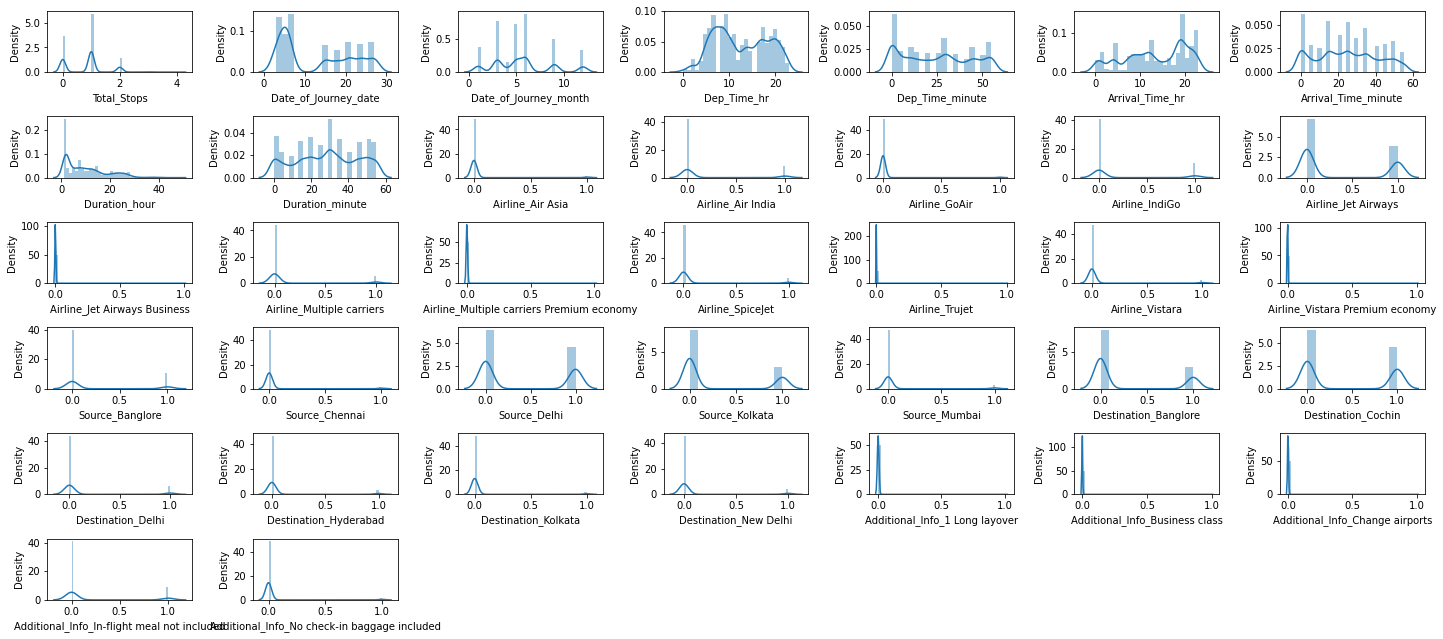

In [48]:
plt.figure(figsize=(20,10))

plotnumber=1

for col in X :
    if plotnumber<=38:
        ax=plt.subplot(7,7,plotnumber)
        sns.distplot(X[col])
        
    plotnumber+=1
    
plt.tight_layout()

features are categorical and we can see outliers. we will apply PCA so not removing outliers.

### PCA-dimension reduction

In [49]:
from sklearn.decomposition import PCA

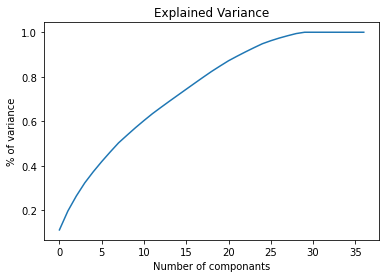

In [50]:
pca=PCA()
principalcomponants=pca.fit_transform(x_scaled)
plt.figure()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance")
plt.xlabel('Number of componants')
plt.ylabel("% of variance")

plt.show()

### 25 components are covering around 92% data. so we will give proceed with 25 components.

In [51]:
pca=PCA(n_components=25)
componants=pca.fit_transform(x_scaled)

principal_comp=pd.DataFrame(componants,columns=[list(range(1,26))])

### Train Test Split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(principal_comp,y,test_size=0.20,random_state=91)

### Model Building

In [55]:
lr=LinearRegression()
rfr=RandomForestRegressor()
xgb=XGBRegressor()
knn=KNeighborsRegressor()

In [57]:
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
xgb.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
print(lr.score(x_train,y_train)*100)
print(rfr.score(x_train,y_train)*100)
print(xgb.score(x_train,y_train)*100)
print(knn.score(x_train,y_train)*100)

56.662092207632675
96.97922235440771
96.63746812654247
85.22867977769519


### Evaluation

In [59]:
#lr score

y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

53.319008955218635


In [60]:
#rfr score

y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

82.90316714385956


In [61]:
#xgb score

y_pred=xgb.predict(x_test)
print(r2_score(y_test,y_pred)*100)

81.55965091376551


In [62]:
#knn score

y_pred=knn.predict(x_test)
print(r2_score(y_test,y_pred)*100)

79.61205660764708


In [63]:
from sklearn.model_selection import cross_val_score

In [65]:
print('Linear Regression score:',np.mean(cross_val_score(lr,principal_comp,y))*100)

print('Random Forest score:',np.mean(cross_val_score(rfr,principal_comp,y))*100)

print('KNN score:',np.mean(cross_val_score(knn,principal_comp,y))*100)

print('xgb score:',np.mean(cross_val_score(xgb,principal_comp,y))*100)

Linear Regression score: -21698.537196984573
Random Forest score: 81.01054848618483
KNN score: 77.86630993883706
xgb score: 79.62058455466176


Random forest regressor is performing best amongs all in every field. so we will go with it.

### Hyperparameter tunning.

In [ ]:
params={'n_estimators':[5,25],
        'criterion':['mse','mae'],
        'min_samples_split':[1,2],
        'min_samples_leaf':[2,3]      
        
    
}

rsv=RandomizedSearchCV(rfr,param_distributions=params)
rsv.fit(x_train,y_train)
rsv.best_params_

couldn't run tunning as its was stuck due to big dataset. so run with least params. will try to tune params manually

In [69]:
rfr=RandomForestRegressor(n_estimators= 75,
 min_samples_split= 2,
 min_samples_leaf= 2,
 criterion= 'mse')

In [70]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

82.7529325765072


I couldn't try more option here because of big dataset. but somehow we are able increase score a bit. Its around 83%

### Final Score

In [71]:
print('CV score of Random Forest score:',np.mean(cross_val_score(rfr,principal_comp,y))*100)
print('R2_Score: ',r2_score(y_test,y_pred)*100)
print('Mean Square Error: ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

CV score of Random Forest score: 80.93588192540666
R2_Score:  82.7529325765072
Mean Square Error:  3455949.3026285036
Mean Absolute Error:  1135.391362005196


### Model Save

In [72]:
file_name='Flight_fare_prediction.pickle'
pickle.dump(rfr,open(file_name,'wb'))